Импортируем библиотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.impute import KNNImputer

from sklearn.manifold import TSNE
import pandas as pd
  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/customer_dataset.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


Закодируем категориальные признаки

In [4]:
cat_columns = ['Gender','Profession','Spending_Score']
num_columns = ['Age','Work_Experience','Family_Size','Var_1']

In [5]:
df['Var_1'] = df['Var_1'].map(lambda x: x if pd.isna(x) else x.replace('Cat_', '')).astype(float)

In [6]:
df.nunique()

ID                 8068
Gender                2
Ever_Married          2
Age                  67
Graduated             2
Profession            9
Work_Experience      15
Spending_Score        3
Family_Size           9
Var_1                 7
dtype: int64

In [7]:
id = df['ID']
df = df.drop(columns = 'ID')

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cat_columns = ['Gender',  'Profession', 'Graduated', 'Ever_Married', 'Spending_Score']

for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [9]:
df['Graduated'] = df['Graduated'].replace('Yes', 1)
df['Graduated'] = df['Graduated'].replace('No', 0)
df['Ever_Married'] = df['Ever_Married'].replace('Yes', 1)
df['Ever_Married'] = df['Ever_Married'].replace('No', 0)

Заполним пропуски

In [10]:
df.isna().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

In [11]:
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df))
X = df

In [12]:
X[1] = X[1].apply(lambda x: 1 if x >= 0.5 else 0)
X[3] = X[3].apply(lambda x: 1 if x >= 0.5 else 0)

In [13]:
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df))
X = df

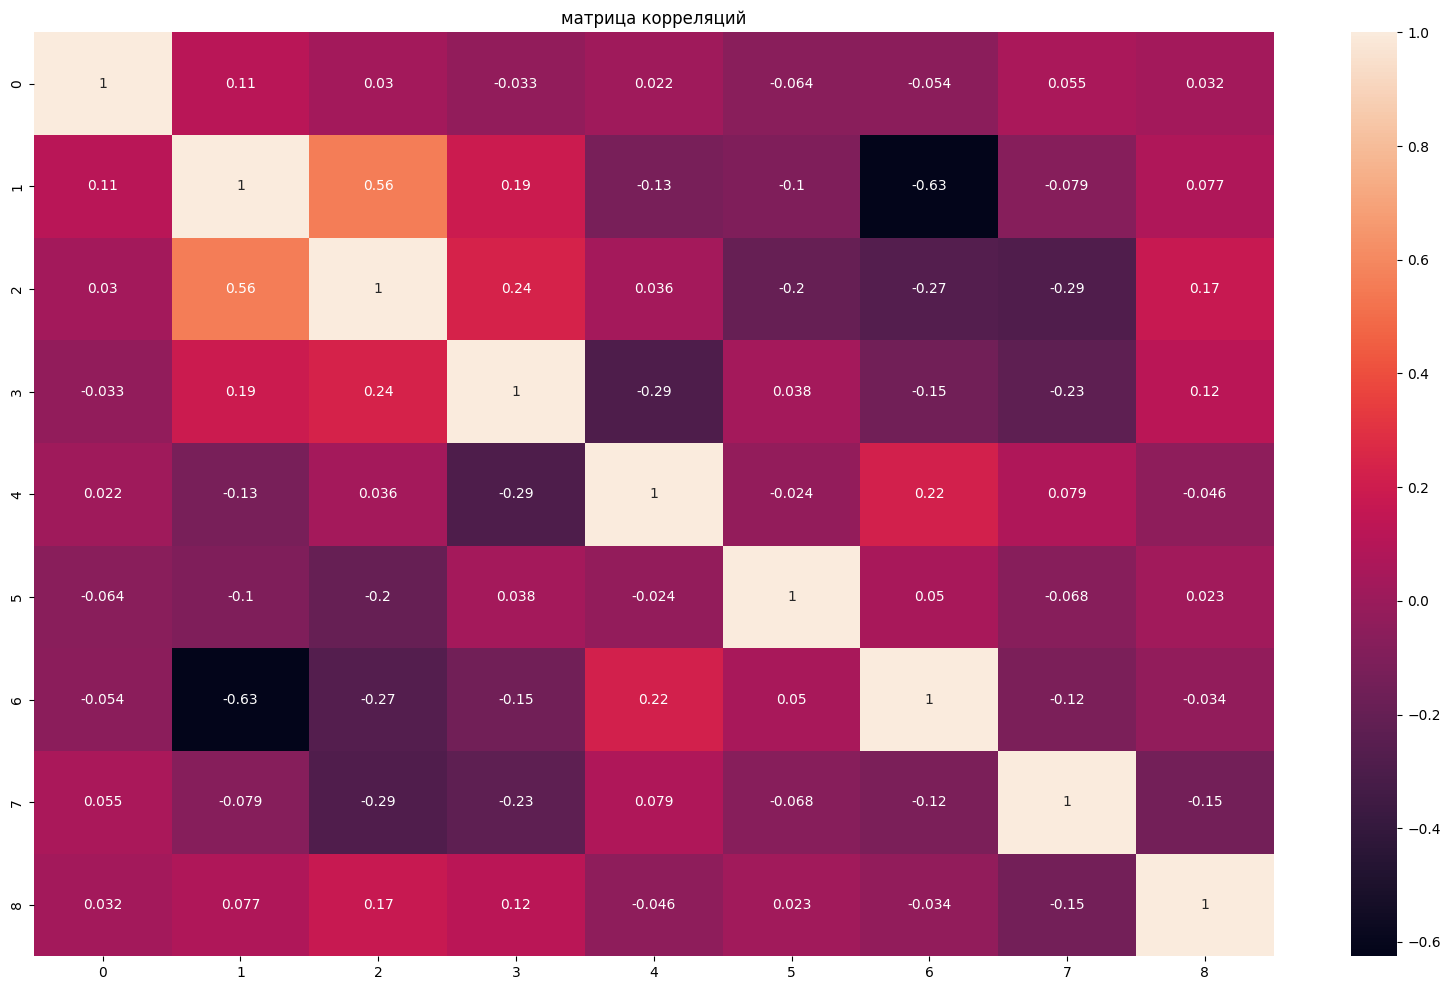

In [14]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)
plt.title("матрица корреляций");

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

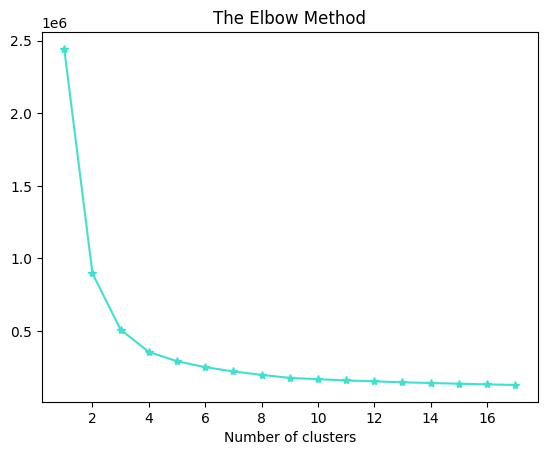

In [15]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 18), wcss,color = "turquoise",marker = '*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

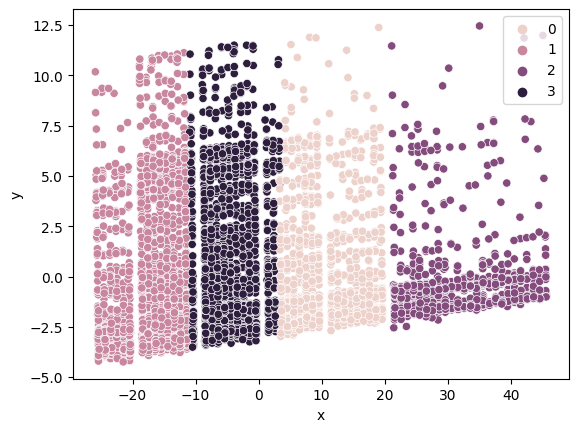

In [87]:
pca = PCA(2)
X_pca1 = pd.DataFrame(pca.fit_transform(X), columns=['x', 'y'])
model1 = KMeans(4)
pred1 = model1.fit_predict(X_pca1)
sns.scatterplot(data=X_pca1, x='x', y='y', hue=model1.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


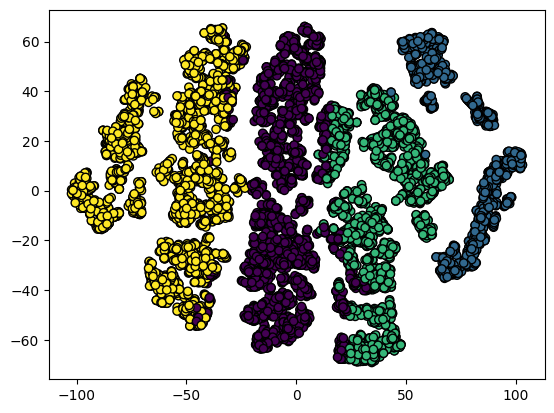

In [88]:
y = model1.fit_predict(X)

# Создание и обучение модели t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Визуализация результатов
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='black')
plt.show()

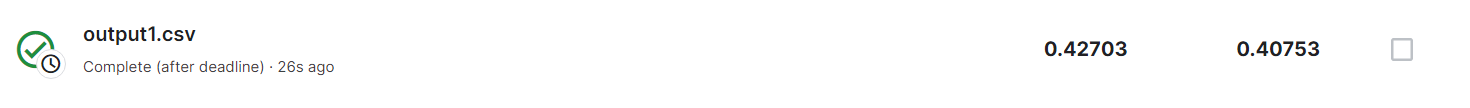

<Axes: xlabel='x', ylabel='y'>

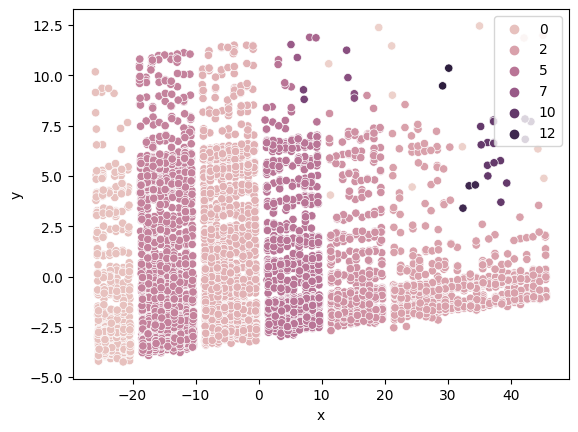

In [89]:
from sklearn.cluster import DBSCAN

pca = PCA(2)
X_pca3 = pd.DataFrame(pca.fit_transform(X), columns=['x', 'y'])
model3 = DBSCAN(eps=1.5, min_samples = 2)
pred3 = model3.fit_predict(X_pca3)
sns.scatterplot(data=X_pca3, x='x', y='y', hue=model3.labels_)

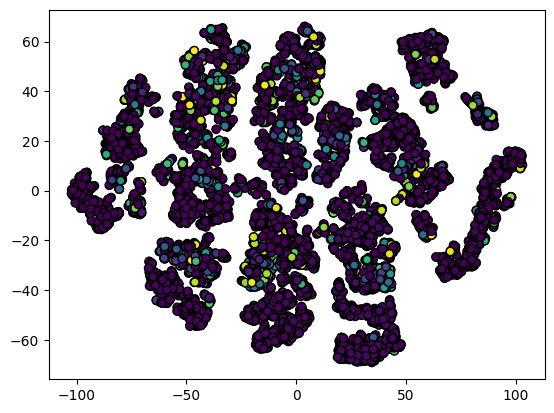

In [90]:
y = model3.fit_predict(X)

# Создание и обучение модели t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Визуализация результатов
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='black')
plt.show()

In [162]:
# from sklearn.cluster import DBSCAN
# plt.figure (figsize= (15,23))
# i = 1
# for samples in [2, 4, 5, 40]:
#   for e in [0.2, 0.3, 0.5, 1]:
#     dbscan = DBSCAN(eps=e, min_samples=samples)
#     clusters = dbscan.fit_predict(X_pca3)
#     plt.subplot(6, 3, i)
#     plt.scatter(data=X_pca3,x='x', y='y', c = clusters)
#     plt.title('eps = {}, min_samples = {}'.format(e, samples))
#     i += 1
#   i+=1
# plt.show ()

In [ ]:

# ## Finding best values of eps and min_samples
# import numpy as np
# import pandas as pd
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import DBSCAN
 
# # Defining the list of hyperparameters to try
# eps_list=np.arange(start=0.1, stop=1.5, step=0.01)
# min_sample_list=np.arange(start=2, stop=5, step=1)
 
# # Creating empty data frame to store the silhouette scores for each trials
# silhouette_scores_data=pd.DataFrame()
 
# for eps_trial in eps_list:
#     for min_sample_trial in min_sample_list:
        
#         # Generating DBSAN clusters
#         db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
#         if(len(np.unique(db.fit_predict(X)))):
#             sil_score=silhouette_score(X, db.fit_predict(X))
#         else:
#             continue
#         trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
#         silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# # Finding out the best hyperparameters with highest Score
# silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

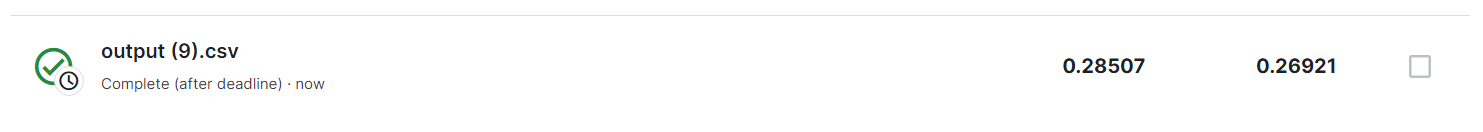

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

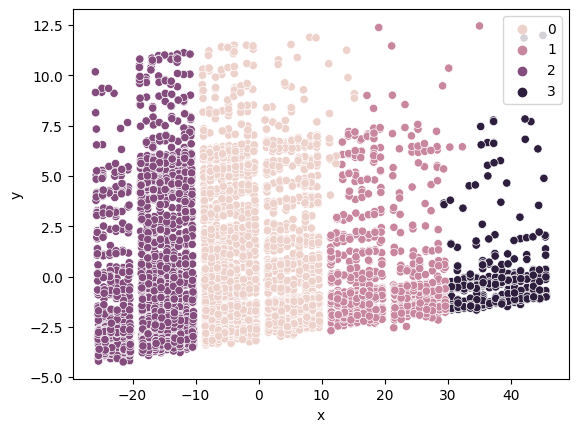

In [91]:
from sklearn.cluster import AgglomerativeClustering

pca = PCA(2)
X_pca2 = pd.DataFrame(pca.fit_transform(X), columns=['x', 'y'])
model2 = AgglomerativeClustering(4, affinity = 'euclidean')
pred2 = model2.fit_predict(X_pca2)


sns.scatterplot(data=X_pca2, x='x', y='y', hue=model2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


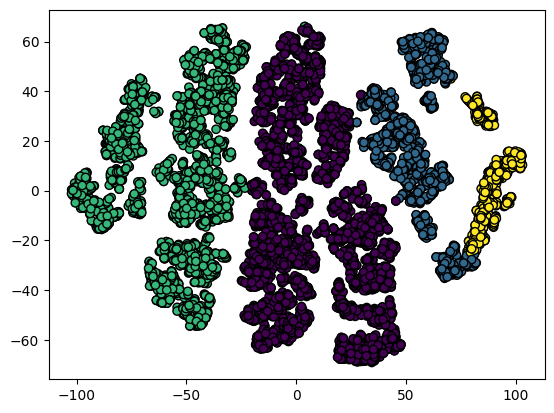

In [92]:
y = model2.fit_predict(X)

# Создание и обучение модели t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Визуализация результатов
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors='black')
plt.show()

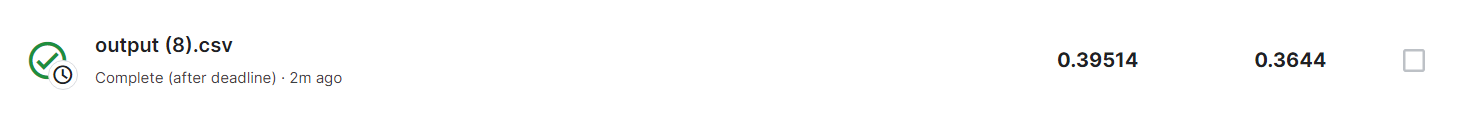

In [94]:
final_model = KMeans(4)
final_model.fit(X)
def encode_labels(labels):
  l = list(pd.Series(labels).unique())
  new_labels = []
  for t in labels:
     new_labels.append(l.index(t) + 1)
  return new_labels
df = pd.read_csv('customer_dataset.csv')

subm = pd.DataFrame({"ID": df.ID, "Segmentation": final_model.labels_})
subm['Segmentation'] = encode_labels(subm['Segmentation'])
subm.to_csv('output3.csv', index=False, columns=['ID', 'Segmentation'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
